In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\ Drive/dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/fact/1022.txt   
  inflating: dataset/fact/1023.txt   
  inflating: dataset/fact/1024.txt   
  inflating: dataset/fact/1025.txt   
  inflating: dataset/fact/1026.txt   
  inflating: dataset/fact/1027.txt   
  inflating: dataset/fact/1028.txt   
  inflating: dataset/fact/1029.txt   
  inflating: dataset/fact/103.txt    
  inflating: dataset/fact/1030.txt   
  inflating: dataset/fact/1031.txt   
  inflating: dataset/fact/1032.txt   
  inflating: dataset/fact/1033.txt   
  inflating: dataset/fact/1034.txt   
  inflating: dataset/fact/1035.txt   
  inflating: dataset/fact/1036.txt   
  inflating: dataset/fact/1037.txt   
  inflating: dataset/fact/1038.txt   
  inflating: dataset/fact/1039.txt   
  inflating: dataset/fact/104.txt    
  inflating: dataset/fact/1040.txt   
  inflating: dataset/fact/1041.txt   
  inflating: dataset/fact/1042.txt   
  inflating: dataset/fact/1043.txt   
  inflating: dataset/fact/1044.txt   

In [ ]:
import csv
import glob
import pandas as pd
import os

In [ ]:
dirpath = "./dataset"
outputpath = 'datasetcsv.csv'
columns_name =["news","label"]
output = open(outputpath,'w')
csvout = csv.DictWriter(output,columns_name)
csvout.writeheader()
count =0
folders_name = os.listdir(dirpath);
for folder in folders_name:
  files = os.listdir(dirpath + '/' + folder)
  for f in files :
    with open(dirpath + '/' + folder + '/' + f,encoding="utf8",errors="ignore")as afile:
      text_file = afile.read().replace('\n','')
      row = {'news': text_file,'label': folder}
      csvout.writerow(row)
output.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

In [ ]:
df = pd.read_csv('datasetcsv.csv')
df

,news,label
0,در انگلیس در حالی که به دلیل شیوع امیکرون، تعد...,fact
1,"دانشمندان ""موسسه تحقیقاتی اسکریپس"" آمریکا در م...",fact
2,اختلال شناختی تا چندین ماه در بازماندگان کووید...,fact
3,ویروس کرونا به جفت جنین حمله می‌کند,fact
4,افرادی که به مواد غذایی خاصی آلرژی دارند می‌ت...,fact
...,...,...
5021,تبلیغ از داروی ایرانی توسط ژاپن,fake
5022,پس تا اینجا معلوم شد که کرونا درمان قطعی دارد ...,fake
5023,استفاده از دمنوش مریم گلی و گیاه پریلا می‌توان...,fake
5024,کلا فقط اینو بدن واکسن همش علکیه حتی انگلیس م...,fake


In [ ]:
# print missing values information
print('missing values stats')
print(df.isnull().sum(), '\n')

# print some missing values
print('some missing values')
print(df[df['news'].isnull()], '\n')
df.dropna(inplace=True)

missing values stats
news     2
label    0
dtype: int64 

some missing values
    news label
486  NaN  fact
881  NaN  fact 



In [ ]:
!pip install hazm

In [ ]:
import hazm
import re

In [ ]:
normalizer = hazm.Normalizer()
stopwords = hazm.stopwords_list
tokenizer = hazm.word_tokenize

def cleaning(text):
    text = text.strip()
    # normalizing
    text = normalizer.normalize(text)
    # removing wierd patterns
    # tokens = tokenizer(text)
    # filtered = list(set(tokens) - set(stopwords()))
    # Define a pattern to match punctuation characters (including Arabic and Persian punctuation)
    # punctuation_pattern = list('،.؛؟!"#$%&\'()*+/:;<=>?@[\\]^_`{|}~')
    # Remove punctuation from the tokens
    # filtered = list(set(filtered) - set(punctuation_pattern))
    # Join the filtered tokens back into a single string
    # text = ' '.join(filtered)
    wierd_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u'\U00010000-\U0010ffff'
        u"\u200d"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\u3030"
        u"\ufe0f"
        u"\u2069"
        u"\u2066"
        u"\u2068"
        u"\u2067"
        "]+", flags=re.UNICODE)

    text = wierd_pattern.sub(r'', text)

    # removing extra spaces, hashtags
    text = re.sub("#", "", text)
    text = re.sub("\s+", " ", text)

    return text



In [ ]:
df['cleaned_news'] = df['news'].apply(cleaning)
df = df[['cleaned_news', 'label']]
df.columns = ['news', 'label']
df

,news,label
0,در انگلیس در حالی که به دلیل شیوع امیکرون، تعد...,fact
1,دانشمندان «موسسه تحقیقاتی اسکریپس» آمریکا در م...,fact
2,اختلال شناختی تا چندین ماه در بازماندگان کووید...,fact
3,ویروس کرونا به جفت جنین حمله می‌کند,fact
4,افرادی که به مواد غذایی خاصی آلرژی دارند می‌تو...,fact
...,...,...
5021,تبلیغ از داروی ایرانی توسط ژاپن,fake
5022,پس تا اینجا معلوم شد که کرونا درمان قطعی دارد ...,fake
5023,استفاده از دمنوش مریم گلی و گیاه پریلا می‌توان...,fake
5024,کلا فقط اینو بدن واکسن همش علکیه حتی انگلیس مت...,fake


In [ ]:
!pip install contractions
!pip install textsearch
!pip install tqdm
import nltk
nltk.download('punkt')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 13.6 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder

# fix random seed for reproducibility
seed = 42
np.random.seed(seed)

In [ ]:


from collections import Counter

# Count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count

In [ ]:
counter = counter_word(df.news)

In [ ]:
counter

Counter({'در': 3229,
         'انگلیس': 42,
         'حالی': 40,
         'که': 2249,
         'به': 3054,
         'دلیل': 113,
         'شیوع': 175,
         'امیکرون،': 12,
         'تعداد': 62,
         'بیمارانی': 13,
         'باید': 184,
         'بیمارستان\u200cها': 23,
         'و': 3718,
         'کلینیک\u200cها': 1,
         'آنها': 83,
         'رسیدگی': 4,
         'شود': 75,
         'بیشتر': 254,
         'شده': 331,
         'اما': 215,
         'بالای': 70,
         'پزشکان': 32,
         'پرستارانی': 1,
         'قرنطینه': 59,
         'یا': 352,
         'بیمار': 69,
         'هستند،': 27,
         'کادر': 28,
         'درمانی': 50,
         'کمتر': 83,
         'تمامی': 19,
         'عمل\u200cهای': 1,
         'جراحی': 11,
         'غیرضروری': 2,
         'تعویق': 14,
         'افتاده': 9,
         'است.': 441,
         'دانشمندان': 65,
         '«موسسه': 3,
         'تحقیقاتی': 9,
         'اسکریپس»': 1,
         'آمریکا': 104,
         'مطالعه': 80,
         'اخیر

In [ ]:
num_unique_words = len(counter)

In [ ]:
labels = list(sorted(df['label'].unique()))
labels

['fact', 'fake']

In [ ]:
df['label_id'] = df['label'].apply(lambda t: labels.index(t))
df

,news,label,label_id
0,در انگلیس در حالی که به دلیل شیوع امیکرون، تعد...,fact,0
1,دانشمندان «موسسه تحقیقاتی اسکریپس» آمریکا در م...,fact,0
2,اختلال شناختی تا چندین ماه در بازماندگان کووید...,fact,0
3,ویروس کرونا به جفت جنین حمله می‌کند,fact,0
4,افرادی که به مواد غذایی خاصی آلرژی دارند می‌تو...,fact,0
...,...,...,...
5021,تبلیغ از داروی ایرانی توسط ژاپن,fake,1
5022,پس تا اینجا معلوم شد که کرونا درمان قطعی دارد ...,fake,1
5023,استفاده از دمنوش مریم گلی و گیاه پریلا می‌توان...,fake,1
5024,کلا فقط اینو بدن واکسن همش علکیه حتی انگلیس مت...,fake,1


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=1, stratify=df['label'])
# train, valid = train_test_split(train, test_size=0.1, random_state=1, stratify=train['label'])


train = train.reset_index(drop=True)
# valid = valid.reset_index(drop=True)
test = test.reset_index(drop=True)

train_sentences, train_labels = np.asarray(train['news'].values.tolist()), np.asarray(train['label_id'].values.tolist())
# val_sentences, val_labels = np.asarray(valid['news'].values.tolist()), np.asarray(valid['label_id'].values.tolist())
test_sentences, test_labels = np.asarray(test['news'].values.tolist()), np.asarray(test['label_id'].values.tolist())

In [ ]:
# Tokenize
from tensorflow.keras.preprocessing.text import Tokenizer

# vectorize a text corpus by turning each text into a sequence of integers
tokenizer = Tokenizer(num_words=num_unique_words)
tokenizer.fit_on_texts(train_sentences) # fit only to training

In [ ]:
# each word has unique index
word_index = tokenizer.word_index

In [ ]:
word_index

{'و': 1,
 'در': 2,
 'به': 3,
 'از': 4,
 'که': 5,
 'واکسن': 6,
 'کرونا': 7,
 'است': 8,
 'را': 9,
 'این': 10,
 'با': 11,
 'کووید': 12,
 'ویروس': 13,
 '۱۹': 14,
 'برای': 15,
 'بیماری': 16,
 'امیکرون': 17,
 'تا': 18,
 'یک': 19,
 'هم': 20,
 'رو': 21,
 'افراد': 22,
 'بر': 23,
 'یا': 24,
 'می\u200cشود': 25,
 'ابتلا': 26,
 'تزریق': 27,
 'دوز': 28,
 'شده': 29,
 'مبتلا': 30,
 'می\u200cدهد': 31,
 'آن': 32,
 'می\u200cکند': 33,
 'جدید': 34,
 'نشان': 35,
 'دو': 36,
 'بیشتر': 37,
 'می\u200cتواند': 38,
 'ایمنی': 39,
 'مردم': 40,
 'من': 41,
 'کاهش': 42,
 'افزایش': 43,
 'استفاده': 44,
 'پس': 45,
 'درصد': 46,
 'کرد': 47,
 'شد': 48,
 'مرگ': 49,
 'هر': 50,
 'بعد': 51,
 'سال': 52,
 'کروناویروس': 53,
 'خود': 54,
 'همه': 55,
 'زدن': 56,
 'نیست': 57,
 'اما': 58,
 'بود': 59,
 'درمان': 60,
 'برابر': 61,
 'دارد': 62,
 'هستند': 63,
 'بدن': 64,
 'بیماران': 65,
 'شدن': 66,
 'اومیکرون': 67,
 'سه': 68,
 'ایران': 69,
 'ما': 70,
 'ماسک': 71,
 '۲': 72,
 'باید': 73,
 'ایجاد': 74,
 'دز': 75,
 'باعث': 76,
 'داروی': 77,
 'شی

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
# val_sequences = tokenizer.texts_to_sequences(val_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)

In [ ]:
# Pad the sequences to have the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Max number of words in a sequence
max_length = 20

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding="post", truncating="post")
# val_padded = pad_sequences(val_sequences, maxlen=max_length, padding="post", truncating="post")
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding="post", truncating="post")
train_padded.shape , test_padded.shape

((4019, 20), (1005, 20))

In [ ]:
EMBED_SIZE = 300
EPOCHS=2
BATCH_SIZE=128

In [ ]:
# create the model
model = Sequential()
model.add(Embedding(num_unique_words, EMBED_SIZE, input_length=max_length))
model.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 300)           4207200   
                                                                 
 conv1d (Conv1D)             (None, 20, 128)           153728    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 128)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 64)            32832     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 5, 64)            0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 5, 32)             8

In [ ]:
# Fit the model
model.fit(train_padded, train_labels,
          validation_split=0.1,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          verbose=1)

Epoch 1/2
29/29 [==============================] - 19s 238ms/step - loss: 0.5550 - accuracy: 0.7036 - val_loss: 0.3220 - val_accuracy: 0.8632
Epoch 2/2
29/29 [==============================] - 6s 206ms/step - loss: 0.1826 - accuracy: 0.9298 - val_loss: 0.2132 - val_accuracy: 0.9204


In [ ]:
# Final evaluation of the model
scores = model.evaluate(test_padded, test_labels, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

32/32 [==============================] - 0s 7ms/step - loss: 0.2838 - accuracy: 0.8856
Accuracy: 88.56%


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [ ]:
predictions = model.predict(test_padded)
ypred = [1 if p > 0.5 else 0 for p in predictions]

print()
print(classification_report(test_labels, ypred, target_names=labels))
print()

print(f'F1: {f1_score(test_labels, ypred, average="weighted")}')

32/32 [==============================] - 0s 4ms/step

              precision    recall  f1-score   support

        fact       0.90      0.86      0.88       502
        fake       0.87      0.91      0.89       503

    accuracy                           0.89      1005
   macro avg       0.89      0.89      0.89      1005
weighted avg       0.89      0.89      0.89      1005


F1: 0.8855095663759702


<Axes: >

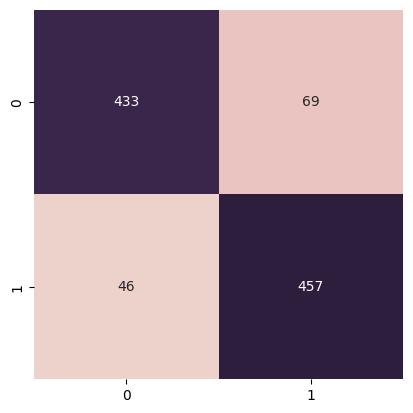

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
matrix_confusion = confusion_matrix(test_labels, ypred)
sb.heatmap(matrix_confusion, square=True, annot=True, cmap=sb.cubehelix_palette(as_cmap=True)
, fmt='d', cbar=False)

In [ ]:
model.save('/content/gdrive/MyDrive/CNN-model')

In [ ]:
new_model = keras.models.load_model("/content/gdrive/MyDrive/CNN-model")

In [ ]:
test_string = 'جعل صحبت‌های آیت الله شبستری مبنی بر ارجحیت جان علما نسبت به مردم'
print(test_string)
test_string = cleaning(test_string)
type(test_string)


جعل صحبت‌های آیت الله شبستری مبنی بر ارجحیت جان علما نسبت به مردم


str

In [ ]:
from collections import Counter

# Count unique words
def counter_word1(text):
    count = Counter()
    for word in text.split():
      count[word] += 1
    return count
counter1 = counter_word1(test_string)
num_unique_words1 = len(counter1)
num_unique_words1
test_string = [test_string]
test_string

['جعل صحبت\u200cهای آیت\u200cالله شبستری مبنی بر ارجحیت جان علما نسبت به مردم']

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# vectorize a text corpus by turning each text into a sequence of integers
tokenizer1 = Tokenizer(num_words=num_unique_words1)
tokenizer1.fit_on_texts(np.asarray(list(test_string)))

In [ ]:
word_index1 = tokenizer1.word_index
word_index1

{'جعل': 1,
 'صحبت\u200cهای': 2,
 'آیت\u200cالله': 3,
 'شبستری': 4,
 'مبنی': 5,
 'بر': 6,
 'ارجحیت': 7,
 'جان': 8,
 'علما': 9,
 'نسبت': 10,
 'به': 11,
 'مردم': 12}

In [ ]:
train_sequences1 = tokenizer1.texts_to_sequences(test_string)

In [ ]:
# Pad the sequences to have the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Max number of words in a sequence
max_length1 = 20

train_padded1 = pad_sequences(train_sequences1, maxlen=max_length1, padding="post", truncating="post")
train_padded1

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  0,  0,  0,  0,
         0,  0,  0,  0]], dtype=int32)

In [ ]:
predictions = new_model.predict(train_padded1)
predictions = [1 if p > 0.5 else 0 for p in predictions]
print(predictions)

1/1 [==============================] - 0s 34ms/step
[1]
